In [111]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [112]:
%matplotlib inline

In [113]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [114]:
dataset = load_boston()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
dataset.data

In [ ]:
dataset.feature_names

In [ ]:
dataset.target

In [ ]:
dataset.data.shape, dataset.target.shape

In [ ]:
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data

In [10]:
data.LSTAT

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [11]:
data['target'] = dataset.target

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
profile = ProfileReport(data)

In [16]:
profile.to_file('boston.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 45169.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
data = data.sample(frac=1)

In [116]:
train, test = train_test_split(data, test_size=.2)

In [117]:
train.shape, test.shape

((404, 14), (102, 14))

In [63]:
xtrain = train.LSTAT.values.reshape(-1, 1)
ytrain = train.target
xtest = test.LSTAT.values.reshape(-1, 1)
ytest = test.target

In [64]:
xtrain.shape

(404, 1)

In [65]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [66]:
lr.coef_, lr.intercept_

(array([-0.9258164]), 34.292770485827404)

In [67]:
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)

In [68]:
yhat_train.shape, yhat_test.shape

((404,), (102,))

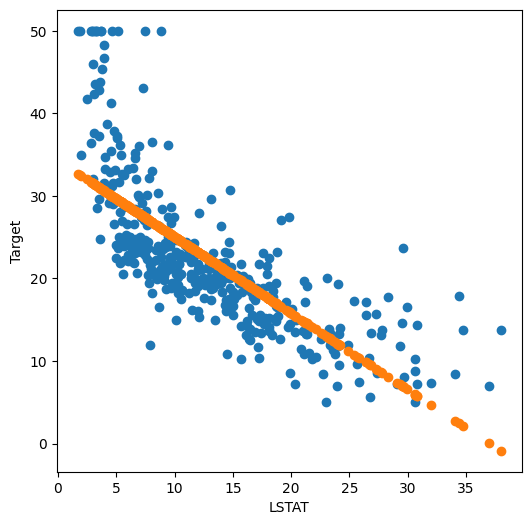

In [69]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Target')
ax.scatter(xtrain, ytrain)
ax.scatter(xtrain, yhat_train)
plt.show()

In [74]:
mean_squared_error(ytrain, yhat_train)

38.13785419107087

In [75]:
np.sqrt(mean_squared_error(ytrain, yhat_train))

6.175585331858906

In [76]:
mean_squared_error(ytest, yhat_test)

40.00844037530429

In [77]:
np.sqrt(mean_squared_error(ytest, yhat_test))

6.325222555397105

Evaluation Metrics

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error

In [84]:
mean_absolute_error(ytrain, yhat_train), mean_absolute_error(ytest, yhat_test) 

(4.489241364919441, 4.584250408385629)

In [82]:
r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test)

(0.5419880173625644, 0.549290861979159)

Multivariate

In [129]:
cols = ['LSTAT','AGE', 'RM']
xtrain = train[cols].copy()
xtest  = test[cols].copy()
ytrain = train['target']
ytest  = test['target']

In [130]:
xtrain.shape, xtest.shape

((404, 3), (102, 3))

In [131]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)

In [132]:
lr.score(xtrain, ytrain)

0.6416743205226255

Normalization

In [134]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [138]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)

In [139]:
xtest = scaler.transform(xtest)

In [140]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [141]:
lr.score(xtest, ytest)

0.6229747309579539